In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\probability':
  os.chdir(r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\probability')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\k\AppData\Local\Temp\ipykernel_45164\491946753.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap_external.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\codecs.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\aliases.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\__init__.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\utf_8.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\io.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\stat.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\_collections_abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\genericpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\ntpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\os.py": 1686090633.0, "C:\\Users\\k

In [2]:
import numpy as np
import pandas as pd
dat = pd.read_csv("currDatSteelCity23.csv")
dat = dat.drop(['Unnamed: 0'], axis=1)
dat.head()

,Opponent,idx,DJI.ID,Full.ID,Game.ID,Point.ID,Possession.ID,Defense.Type,Handler,Receiver,...,BasicEPAOpp,TrueEPAHan,TrueEPARec,EPA,OppFactor2,EPAHan,EPARec,EPAHanRes,EPAHanTot,EPAHan2
0,Binghamton,538,472,1.1.1,1,1,1,Man,NaN,Micah,...,0.000,0.000,0.000,0.000,0.0,NaN,NaN,0.000,NaN,NaN
1,Binghamton,539,472,1.1.1,1,1,1,Man,Micah,John,...,0.024,0.018,0.005,0.053,0.0,0.039,0.014,0.015,0.054,0.059
2,Binghamton,540,472,1.1.1,1,1,1,Man,John,Dan B,...,0.011,0.008,0.002,0.042,0.0,0.031,0.011,0.000,0.031,0.046
3,Binghamton,541,472,1.1.1,1,1,1,Man,Dan B,Gribs,...,-0.249,-0.249,0.000,-0.420,0.0,-0.420,0.000,0.000,-0.420,-0.420
4,Binghamton,542,472,1.1.2,1,1,2,Man,NaN,Micah,...,0.000,0.000,0.000,0.000,0.0,NaN,0.000,0.000,NaN,NaN


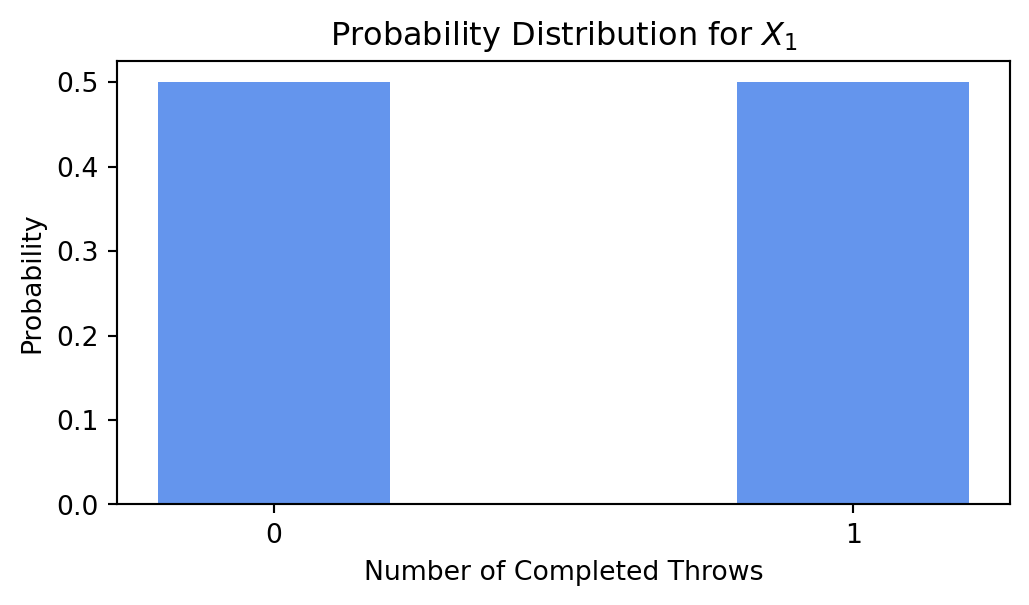

In [3]:
import matplotlib.pyplot as plt
x = {'0':0.5, '1':0.5}
completions = list(x.keys())
probabilities = list(x.values())

fig = plt.figure(figsize = (6, 3))
plt.bar(completions, probabilities, color = 'cornflowerblue', width = 0.4)
plt.xlabel("Number of Completed Throws")
plt.ylabel("Probability")
plt.title("Probability Distribution for $X_1$")
plt.show()

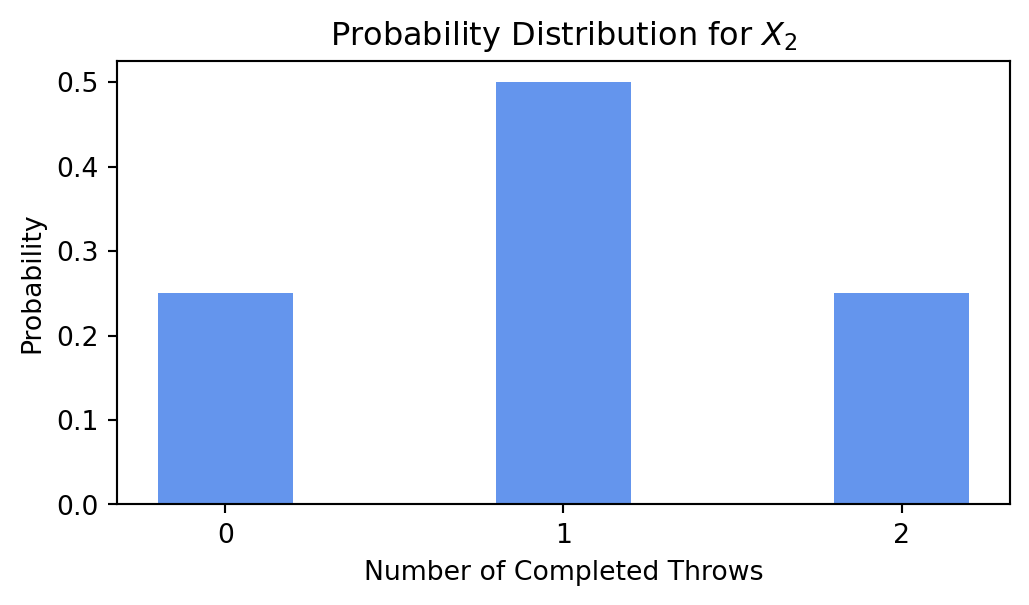

In [4]:
x = {'0':0.25, '1':0.5, '2':0.25}
completions = list(x.keys())
probabilities = list(x.values())

fig = plt.figure(figsize = (6, 3))
plt.bar(completions, probabilities, color = 'cornflowerblue', width = 0.4)
plt.xlabel("Number of Completed Throws")
plt.ylabel("Probability")
plt.title("Probability Distribution for $X_2$")
plt.show()

0    0.4921
1    0.5079
dtype: float64


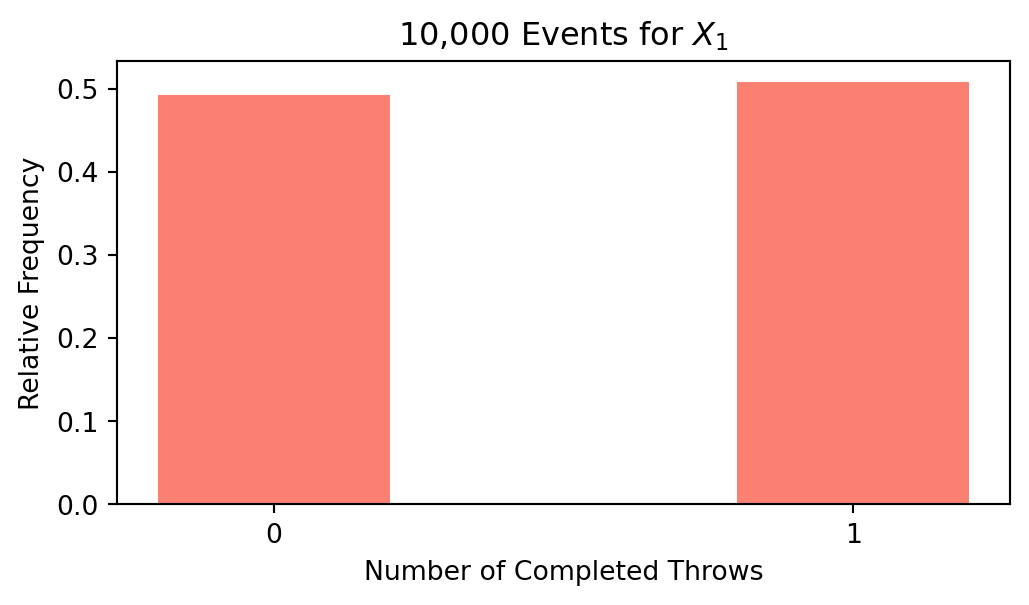

In [5]:
n, p = 1, 0.5
s = np.random.binomial(n, p, 10000)
df = pd.Series(s).value_counts() / len(s)
df = df.sort_index()

completions = list(map(str, list(df.keys())))
freq = list(df.values)

print(df)

fig = plt.figure(figsize = (6, 3))
plt.bar(completions, freq, color = 'salmon', width = 0.4)
plt.xlabel("Number of Completed Throws")
plt.ylabel("Relative Frequency")
plt.title("10,000 Events for $X_1$")
plt.show()

0    0.2518
1    0.5009
2    0.2473
dtype: float64


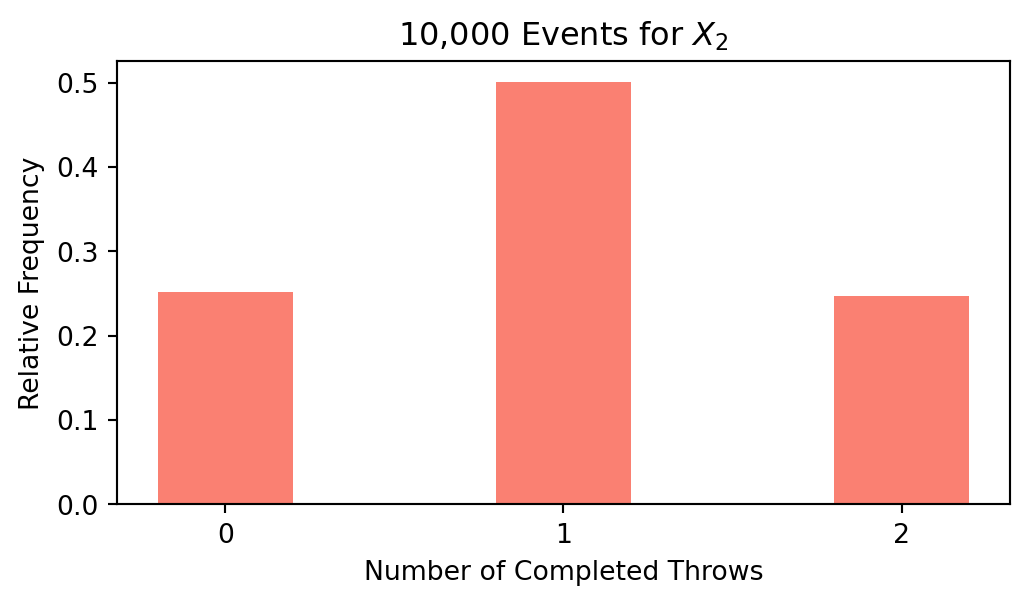

In [6]:
n, p = 2, 0.5
s = np.random.binomial(n, p, 10000)
df = pd.Series(s).value_counts() / len(s)
df = df.sort_index()

completions = list(map(str, list(df.keys())))
freq = list(df.values)

print(df)

fig = plt.figure(figsize = (6, 3))
plt.bar(completions, freq, color = 'salmon', width = 0.4)
plt.xlabel("Number of Completed Throws")
plt.ylabel("Relative Frequency")
plt.title("10,000 Events for $X_2$")
plt.show()

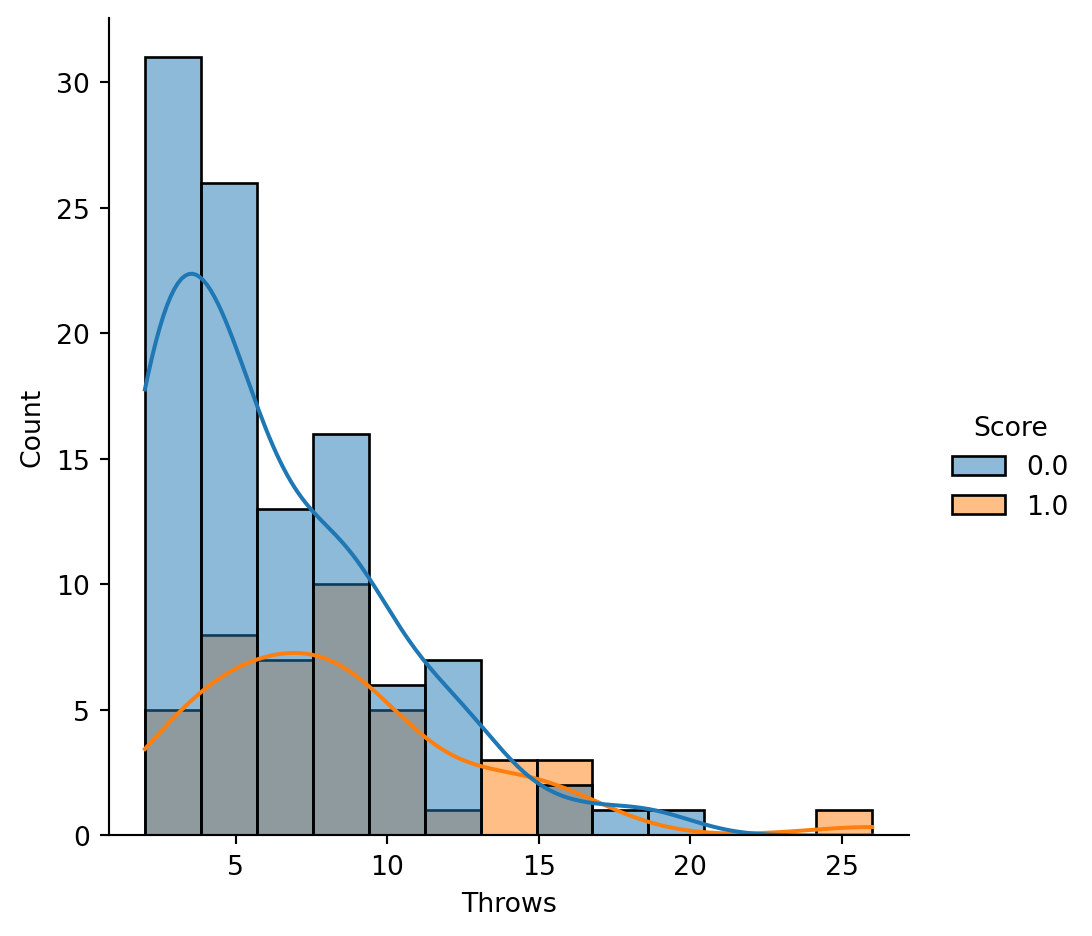

,Full.ID,Throws,Score


In [7]:
import seaborn as sns
possession = dat.groupby('Full.ID') \
                .agg(Throws=('Possession.Result', 'size'), Score=('Possession.Result', 'mean')) \
                .reset_index()
sns.displot(possession, x="Throws", kde=True, hue="Score", stat="count")
plt.show()
possession.loc[(possession['Score'] > 0.0) & (possession['Score'] < 1.0)]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error                # metric for evaluating regression model
from sklearn.metrics import mean_absolute_error               # metric for evaluating regression model
from sklearn.metrics import r2_score                          # metric for evaluating regression model

X = possession['Score']
X = X.array.reshape(-1, 1)
y = possession['Throws']
lin_reg = LinearRegression().fit(X, y)

y_pred = lin_reg.predict(X)
print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("r2:", r2_score(y, y_pred))

MAE: 3.2052691321520363
MSE: 16.764008697346565
r2: 0.053219132145364445
